In [26]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
import torch

We will use  cuda
Load Training Data Successfully!
Train Data:	 36268
Length of Waves:	 1008
Length of Training data:	 32641
Length of Testing data:	 3627
Keys of directory:	 dict_keys(['WaveWithNoise', 'WaveNoNoise'])
Loading Model


RuntimeError: CUDA error: an illegal memory access was encountered

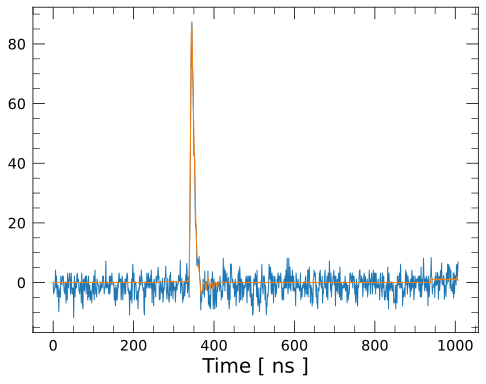

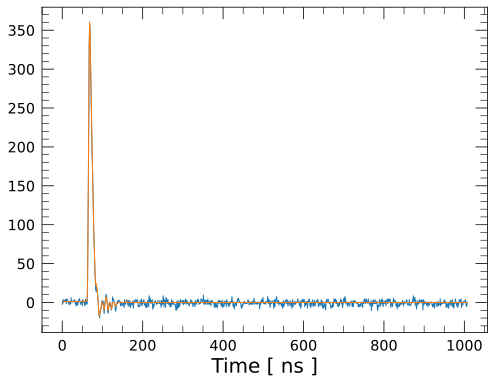

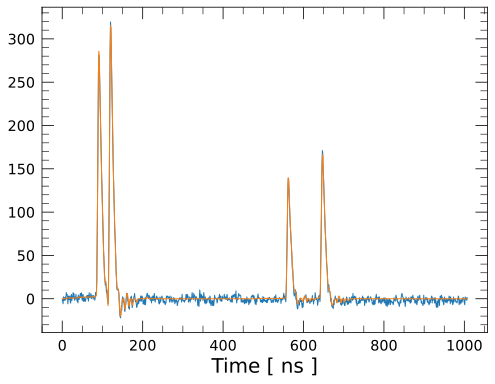

In [52]:
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/wave_denoise_training/")

from importlib import reload
import WaveDenoise_Autoencoder
reload(WaveDenoise_Autoencoder)
from WaveDenoise_Autoencoder import WaveDenoise
denoiser = WaveDenoise()
denoiser.LoadTrainData("/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/wave_denoise_training/OneHAMCase_Waves.npz")
denoiser.SplitTrainData(ratio_train=0.9)


dir_data = denoiser.dir_data
print("Keys of directory:\t",dir_data.keys())
for i in range(3):
    plt.figure()
    plt.plot(dir_data["WaveWithNoise"][i], label="w/ noise", linewidth=1)
    plt.plot(dir_data["WaveNoNoise"][i], label="w/o noise", linewidth=1)
    plt.xlabel("Time [ ns ]")
    


# denoiser.NormalizeData()
denoiser.SimpleModelFlow(only_test=False)
# denoiser.SimpleModelFlow(only_test=True)